# **Load Library**

In [43]:
import numpy as np
import pandas as pd

In [44]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
data_file = '/content/drive/MyDrive/Edge/Evaluation-dataset (1).csv'
df = pd.read_csv(data_file)

In [46]:
df.head()

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Analyze Data**

1.   i found there are 3 col of subtheme
2.   make a df



In [47]:

df = df.iloc[:, :4]
df.columns = ['Text', 'subtheme1', 'subtheme2','subtheme3']
df


,Text,subtheme1,subtheme2,subtheme3
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative
...,...,...,...,...
10126,"I ordered the wrong tyres, however [REDACTED] ...",refund positive,delivery punctuality positive,refund timescale positive
10127,"Good experience, first time I have used [REDAC...",length of fitting positive,NaN,NaN
10128,"I ordered the tyre I needed on line, booked a ...",location positive,delivery punctuality positive,length of fitting positive
10129,Excellent service from point of order to fitti...,NaN,NaN,NaN


In [48]:
#nalyze count of each rows words of col Text,do some analysis avg lenghth of text ,max lenght min lenght
df['word_count'] = df['Text'].str.split().str.len()
average_length = df['Text'].str.len().mean()
max_length = df['Text'].str.len().max()
min_length = df['Text'].str.len().min()
print(f" Analysis of sentences \n min Length={min_length}\n max Length={max_length}\n Avg Length={average_length}")

 Analysis of sentences 
 min Length=1
 max Length=3553
 Avg Length=126.48702003750864


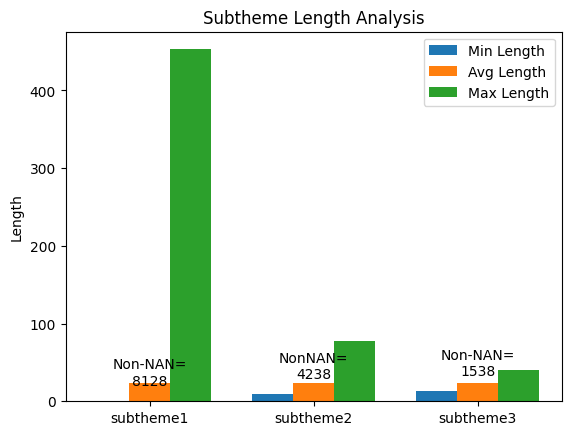

In [49]:
# subthem1,2 and 3 analyze a plot like each col rows subtheme lenght(min,max,avg) and also no nan values in each col

import matplotlib.pyplot as plt
# Calculate the min, max, and average length of each subtheme
subtheme1_lengths = df['subtheme1'].str.len()
subtheme2_lengths = df['subtheme2'].str.len()
subtheme3_lengths = df['subtheme3'].str.len()

min_lengths = [subtheme1_lengths.min(), subtheme2_lengths.min(), subtheme3_lengths.min()]
max_lengths = [subtheme1_lengths.max(), subtheme2_lengths.max(), subtheme3_lengths.max()]
avg_lengths = [subtheme1_lengths.mean(), subtheme2_lengths.mean(), subtheme3_lengths.mean()]

# Count the number of non-NaN values in each subtheme
subtheme1_non_nan_count = df['subtheme1'].notna().sum()
subtheme2_non_nan_count = df['subtheme2'].notna().sum()
subtheme3_non_nan_count = df['subtheme3'].notna().sum()

# Create a bar plot of the min, max, and average length of each subtheme
x_labels = ['subtheme1', 'subtheme2', 'subtheme3']
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(x_labels)) - width, min_lengths, width, label='Min Length')
rects2 = ax.bar(np.arange(len(x_labels)), avg_lengths, width, label='Avg Length')
rects3 = ax.bar(np.arange(len(x_labels)) + width, max_lengths, width, label='Max Length')

# Add labels and title
ax.set_ylabel('Length')
ax.set_title('Subtheme Length Analysis')
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels)
ax.legend()
# Add annotations for non-NaN values
ax.annotate(f'Non-NAN=\n{subtheme1_non_nan_count}', xy=(0, min_lengths[0] + 20), ha='center')
ax.annotate(f'NonNAN=\n{subtheme2_non_nan_count}', xy=(1, min_lengths[1] + 20), ha='center')
ax.annotate(f'Non-NAN=\n{subtheme3_non_nan_count}', xy=(2, min_lengths[2] + 20), ha='center')

plt.show()




*   Mostly data have 1 subtheme
*   50% of data have 2 subtheme(approx)
*   only 15% data have 3  subtheme(approx)



**Unique Aspect**

In [50]:
def remove_sentiment_word(sentence):
    words = sentence.split()
    # Check if the last word is a sentiment word
    sentiment_words = ['positive', 'negative', 'neutral']
    if words[-1].lower() in sentiment_words:
        # Remove the last word
        modified_sentence = ' '.join(words[:-1])
        return modified_sentence
    else:
        # No sentiment word found, return the original sentence
        return sentence

In [51]:
import matplotlib.patches as patches
import random
for i in random.sample(range(df.shape[0]),10):
  text = df['Text'].iloc[i]
  subthemes = [df['subtheme1'].iloc[i], df['subtheme2'].iloc[i], df['subtheme3'].iloc[i]]
  colors = ['yellow', 'green', 'blue']
  print(f" index {i}--{text}\n {subthemes}")
  print("________________________________________________________________________")


 index 2131--good prices and excellent service when fitting tyre - will use again.
 ['value for money positive', 'garage service positive', nan]
________________________________________________________________________
 index 8428--Good Clear Service. Good, prompt service.Probably best retail prices. Local tyre fitters could be better rated
 ['value for money positive', 'location positive', nan]
________________________________________________________________________
 index 3617--I received excellent service both friendly no nonsense a pleasure to do business with.
 ['garage service positive', nan, nan]
________________________________________________________________________
 index 1414--Good service, fitting was at the same location that I have normally used direct.
 ['location positive', nan, nan]
________________________________________________________________________
 index 1431--Great, polite service at garage and great price for tyres.
 ['value for money positive', 'garage service

In [52]:
uniques1=df['subtheme1'].reset_index(drop=True).tolist()
uniques2=df['subtheme2'].reset_index(drop=True).tolist()
uniques3=df['subtheme3'].reset_index(drop=True).tolist()
print(f"length of uniques subtheme in each col\n subtheme1={len(uniques1)}\n subtheme2={len(uniques2)}\n subthemes3={len(uniques3)}")

length of uniques subtheme in each col
 subtheme1=10131
 subtheme2=10131
 subthemes3=10131


In [53]:
# uniques1

In [54]:
uniques=uniques1+uniques2+uniques3

In [55]:
len(uniques)
print(f"subthem1                                              ||subtheme2                                              ||subtheme3")
print("---------------------------------------------------------------------------------------------------------------------------")
for i in range(10):
    print(f"{uniques1[i]}                           {uniques2[i]}                                           {uniques3[i]}")

subthem1                                              ||subtheme2                                              ||subtheme3
---------------------------------------------------------------------------------------------------------------------------
garage service positive                           value for money positive                                           nan
value for money positive                           nan                                           nan
ease of booking positive                           nan                                           nan
location positive                           value for money positive                                           ease of booking positive
length of fitting positive                           ease of booking positive                                           ease of booking negative
garage service positive                           value for money positive                                           nan
value for money positive    

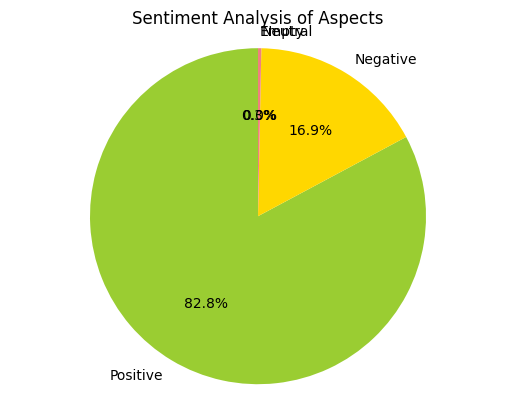

Positive aspects: 11515
Negative aspects: 2345
Neutral aspects: 0
Empty aspects: 44
Total aspects: 13904


In [56]:
pos_asp=[]
neg_asp=[]
empty_asp=[]
aspects = uniques
positive_count = 0
negative_count = 0
neutral_count = 0
empty_count = 0

for aspect in aspects:
    words = str(aspect).split()
    if len(words) > 0 and str(aspect)!='nan':
        sentiment = words[-1].lower()
        if sentiment == 'positive':
            positive_count += 1
            pos_asp.append(remove_sentiment_word(str(aspect)))
        elif sentiment == 'negative':
            negative_count += 1
            neg_asp.append(remove_sentiment_word(str(aspect)))
        elif sentiment == 'neutral':
            neutral_count += 1
        else:
            empty_count += 1
            empty_asp.append(str(aspect))

labels = ['Positive', 'Negative', 'Neutral', 'Empty']
sizes = [positive_count, negative_count, neutral_count, empty_count]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sentiment Analysis of Aspects')
plt.axis('equal')
plt.show()

print(f"Positive aspects: {positive_count}")
print(f"Negative aspects: {negative_count}")
print(f"Neutral aspects: {neutral_count}")
print(f"Empty aspects: {empty_count}")
print(f"Total aspects: {positive_count+negative_count+empty_count+neutral_count}")


In [57]:
pos_asp[0]

'garage service'

In [58]:
import matplotlib.pyplot as plt

def combine_unique_strings_with_counts(list1, list2, list3):
    """Combines three lists of strings into a new dictionary containing unique strings as keys and their counts as values.

    Args:
        list1 (list): The first list of strings.
        list2 (list): The second list of strings.
        list3 (list): The third list of strings.

    Returns:
        dict: A dictionary where keys are unique strings from the three input lists and values are their corresponding counts.

    Raises:
        TypeError: If any of the input lists are not of type list.
        ValueError: If any of the input lists contain non-string elements.
    """

    if not all(isinstance(l, list) for l in (list1, list2, list3)):
        raise TypeError("Input lists must be of type list.")

    for l in (list1, list2, list3):
        if not all(isinstance(s, str) for s in l):
            raise ValueError("Input lists must contain only strings.")

    combined_list = list1 + list2 + list3
    unique_counts = {s: combined_list.count(s) for s in set(combined_list)}

    return unique_counts

unique_counts = combine_unique_strings_with_counts(pos_asp, neg_asp, empty_asp)
# Plot the bar chart
unique_strings = list(unique_counts.keys())
unique_counts_list = list(unique_counts.values())
print(f"Length of unique aspect: {len(unique_counts)}")



Length of unique aspect: 76


*Only 76 are unique aspect*

In [59]:
one={key: value for key, value in unique_counts.items() if value ==1}
one,len(one)

({' good range and competitive prices on website': 1,
  ' hassle free': 1,
  ' simple fitting procedure': 1,
  " one tyre with dangerously low air pressure. Asked the garage to top up the tyre and check the other three. They did top up the one tyre but didn't bother to check the others. When I checked the tyres 10 minutes later all four tyres had varying pressures (from 29 to 37.5). I emailed both companies and have not received an apology from either. I will never use Lavender Motors again (they shouldn't be in business) and likely not [REDACTED].com either.": 1,
  ' clean reception area and free coffee': 1,
  ' staff were courteous': 1,
  ' ability to browse through various makes of tyres before making a decision': 1,
  ' fitting took a long time.': 1,
  ' easy to browse selection of tyres before making a choice': 1,
  ' Great garage fitted them': 1,
  ' Garage was quick & efficient with fitting of tyres': 1,
  ' really friendly and efficient service.': 1,
  'no issues': 1,
  ' and a

* *44 have only one count-means they occured only once in dataset*
* some of them are too long aspect its like feedback-we can make it more intuitive by extracting better aspect


In [60]:
more_one={key: value for key, value in unique_counts.items() if value >1}
len(more_one),more_one

(32,
 {'value for money': 4828,
  'failed payment': 4,
  'response time': 93,
  'advisor/agent service': 231,
  'discount not applied': 9,
  'tyre agedot code': 8,
  "mobile fitter didn't arrive": 8,
  'change of date': 270,
  'extra charges': 117,
  'garage service': 2359,
  'change of time': 39,
  'refund': 43,
  'incorrect tyres sent': 64,
  'discounts': 135,
  'facilities': 39,
  'booking confusion': 105,
  'call wait time': 21,
  'wait time': 371,
  'refund timescale': 10,
  'late notice': 65,
  'refund not actioned': 14,
  'length of fitting': 719,
  'damage': 115,
  'tyre quality': 459,
  'no stock': 35,
  'ease of booking': 1360,
  'balancing': 33,
  'tyre age/dot code': 9,
  'mobile fitter': 244,
  'location': 1061,
  'advisoragent service': 324,
  'delivery punctuality': 668})



*   *We have 32 aspect which occurs mostly in dataset*
*   These are more insightsfull



# **Using LLM for Subtheme Analysis**


*   Aspect Extraction

*   Sentiment prediction
*   Tech:
    *  Langchain
    * LLM



In [61]:
%%capture
!pip install langchain -U
!pip install openai
!pip install python-dotenv
!pip install --upgrade --quiet  langchain-google-genai pillow


In [62]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.chains import SequentialChain
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv
import os
import openai

In [63]:
load_dotenv('/content/vars.env')
from google.colab import userdata
os.environ['OPENAI_API_KEY']=userdata.get('OPENAI_API_KEY')
os.environ["GOOGLE_API_KEY"]=userdata.get('GOOGLE_API_KEY')
# llm=OpenAI(temperature=0.7)# exceeded  qouta limit
from langchain_google_genai import GoogleGenerativeAI, HarmBlockThreshold, HarmCategory
llm = ChatGoogleGenerativeAI(model="gemini-pro",safety_settings={
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT:HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HATE_SPEECH:HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT:HarmBlockThreshold.BLOCK_NONE,
    },)

# Chains

# **Aspect Extraction**

In [64]:
# my algorithm:
#  we have some existing aspects from data i will give more weightge to those have >1 counts
#as also consider those have 1 counts as it is very high(44 here) but we will do some preprocessing to make it small and insightsfull
# give some example and corresponding aspect to llm chain to understand(few shot learning)
# for make it boundary we will provide all the aspects so that it will look for these in sentences.
# we can give of each unique aspects atleast 1 review so that llm know how aspects comes with review


In [65]:
import random
import json

def create_json_data(df, num_samples=5):
    """
    Creates JSON data from a DataFrame with 'Text', 'subtheme1', 'subtheme2', and 'subtheme3' columns.
    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        num_samples (int, optional): The number of random samples to include. Defaults to 5.
    Returns:
        list: A list of dictionaries, each representing a review with its associated aspects.
    """
    if num_samples > df.shape[0]:
        raise ValueError("Number of samples cannot exceed the number of available rows.")
    # Filter out empty subthemes
    df.replace('', None, inplace=True)
    df.dropna(subset=['subtheme1', 'subtheme2', 'subtheme3','Text'], inplace=True)
    # Select random samples
    random_indices = random.sample(range(df.shape[0]), num_samples)
    # Filter DataFrame based on selected indices
    sampled_df = df.iloc[random_indices]

    # Create JSON data
    json_data = []
    for index, row in sampled_df.iterrows():
        review = row["Text"]
        aspects = "Relevent Aspect are:"+",".join([remove_sentiment_word(aspect) for aspect in [row["subtheme1"], row["subtheme2"], row["subtheme3"]] if aspect is not None])
        json_data.append({"review": review, "aspects": aspects})
    return json_data

prompt_ex_data = create_json_data(df, num_samples=50)
print(json.dumps(prompt_ex_data, indent=4))


[
    {
        "review": "The ordering and booking process was straight forward. However the fitting of the tyres was delayed so had to hang around for over 45mins longer than expected. Something beyond [REDACTED] influence.",
        "aspects": "Relevent Aspect are:ease of booking,wait time,wait time"
    },
    {
        "review": "[REDACTED] is an excellent service. The tyre choice is comprehensive, the prices rarely bettered, and the local fitting deals (Wiltshire Tyres in Melksham in my case) work competently and efficiently. Don't have any doubts about sourcing tyres this way.",
        "aspects": "Relevent Aspect are:value for money,length of fitting,garage service"
    },
    {
        "review": "It was so easy , from ordering to arranging fitting a kind of one stop shop even getting to pick a time slot for fitting absolutely brilliant. Also extremely good prices",
        "aspects": "Relevent Aspect are:location,value for money,ease of booking"
    },
    {
        "review": 

In [66]:
#define a format that will convert examples into string for llm
ex_prompt_template=''' Review:{review}
{aspects}'''
ex_prompt=PromptTemplate(input_variables=['review','aspects'],template=ex_prompt_template)
print(ex_prompt.format(**prompt_ex_data[0]))

 Review:The ordering and booking process was straight forward. However the fitting of the tyres was delayed so had to hang around for over 45mins longer than expected. Something beyond [REDACTED] influence.
Relevent Aspect are:ease of booking,wait time,wait time


In [67]:
pr = f'''
We are analyzing Garage data to extract aspects for subtheme sentiment analysis. The goal is to identify key aspects **(subthemes)**
relevant to the reviewer's experience. Here are some common examples:
{more_one.keys()}
However, don't limit yourself to these examples! Feel free to capture other relevant themes that reveal
the reviewer's thoughts and feelings about the **product, service, staff, environment, etc.** Remember, you're looking for insightful
 aspects that paint a complete picture of the reviewer's experience.
**Additionally, consider the following factors:**
* The reviewer's sentiment
* Potential correlations between subthemes (e.g., value for money and positive garage service)
* Specific aspects relevant to domain (e.g., tire quality, balancing, etc.)
** return all the relevent aspects(subtheme) in list**
'''

In [68]:
final_prompt=FewShotPromptTemplate(
    examples=prompt_ex_data,
    example_prompt=ex_prompt,
    input_variables=['review'],
    suffix="Review: {review}/n",
    prefix=pr
)
print(final_prompt.format(review="Excellent value for money ,big saving over other companies.Quick efficient local fitting service"))


We are analyzing Garage data to extract aspects for subtheme sentiment analysis. The goal is to identify key aspects **(subthemes)**
relevant to the reviewer's experience. Here are some common examples:
dict_keys(['value for money', 'failed payment', 'response time', 'advisor/agent service', 'discount not applied', 'tyre agedot code', "mobile fitter didn't arrive", 'change of date', 'extra charges', 'garage service', 'change of time', 'refund', 'incorrect tyres sent', 'discounts', 'facilities', 'booking confusion', 'call wait time', 'wait time', 'refund timescale', 'late notice', 'refund not actioned', 'length of fitting', 'damage', 'tyre quality', 'no stock', 'ease of booking', 'balancing', 'tyre age/dot code', 'mobile fitter', 'location', 'advisoragent service', 'delivery punctuality'])
However, don't limit yourself to these examples! Feel free to capture other relevant themes that reveal
the reviewer's thoughts and feelings about the **product, service, staff, environment, etc.** R

In [69]:
aspects_ext_chain=LLMChain(llm=llm,prompt=final_prompt,output_key='aspects')
out=aspects_ext_chain.predict(review="Excellent value for money ,big saving over other companies.Quick efficient local fitting service")
print(out)

['ease of booking', 'wait time', 'wait time', 'length of fitting', 'garage service', 'delivery punctuality', 'location', 'tyre quality', 'value for money', 'garage service', 'facilities', 'mobile fitter', 'delivery punctuality', 'length of fitting', 'mobile fitter', 'location', 'advisoragent service', 'change of date', 'garage service', 'facilities', 'late notice', 'delivery punctuality', 'value for money', 'garage service', 'location', 'tyre quality', 'value for money', 'change of date', 'delivery punctuality', 'garage service', 'length of fitting', 'garage service', 'value for money', 'delivery punctuality', 'wait time', 'location', 'value for money', 'ease of booking', 'location', 'value for money', 'ease of booking', 'location', 'value for money', 'garage service', 'mobile fitter', 'wait time', 'location', 'value for money', 'garage service', 'extra charges', 'garage service', 'value for money', 'location', 'value for money', 'ease of booking', 'length of fitting', 'location', 'len

# Sentiment Analysis Chain

In [70]:
#here we can use any llm as we have subtheme
# llm=OpenAI()
llm = ChatGoogleGenerativeAI(model="gemini-pro")

In [71]:
sent_prompt='''Given Review and subthemes which is extracted aspects from the given review you have to give each
aspect with their sentiment class like 'positive','negative' in a format like (aspect,sentiment).
before giving sentiment carefully analyze customers point of view.
Review:{review}
Aspects:{aspects}
[(aspect1,sentiment of aspect1),(aspect2,sentiment of aspect2),(aspect3,sentiment of aspect3)]
'''
sent_prompt_final=PromptTemplate(input_variables=['review','aspects'],template=sent_prompt)
print(sent_prompt_final)

input_variables=['aspects', 'review'] template="Given Review and subthemes which is extracted aspects from the given review you have to give each\naspect with their sentiment class like 'positive','negative' in a format like (aspect,sentiment).\nbefore giving sentiment carefully analyze customers point of view.\nReview:{review}\nAspects:{aspects}\n[(aspect1,sentiment of aspect1),(aspect2,sentiment of aspect2),(aspect3,sentiment of aspect3)]\n"


In [72]:
sent_chain=LLMChain(llm=llm,prompt=sent_prompt_final,output_key='aspects_with_sentiment')

**Final Sequential Chain**

In [73]:
subtheme_chain=SequentialChain(
    chains=[aspects_ext_chain,sent_chain],
    input_variables=['review'],
    output_variables=['review','aspects','aspects_with_sentiment'],
    verbose=False
)

In [74]:
input={"review":"Excellent value for money ,big saving over other companies.Quick efficient local fitting service"}
out=subtheme_chain(input)
print(out)

{'review': 'Excellent value for money ,big saving over other companies.Quick efficient local fitting service', 'aspects': '* ease of booking\n* wait time\n* wait time\n* value for money\n* length of fitting\n* garage service\n* location\n* tyre quality\n* value for money\n* location\n* ease of booking\n* length of fitting\n* value for money\n* change of date\n* garage service\n* facilities\n* length of fitting\n* mobile fitter\n* delivery punctuality\n* location\n* tyre quality\n* value for money\n* late notice\n* delivery punctuality\n* value for money\n* location\n* garage service\n* facilities\n* change of date\n* delivery punctuality\n* garage service\n* value for money\n* delivery punctuality\n* garage service\n* location\n* value for money\n* ease of booking\n* location\n* value for money\n* ease of booking\n* garage service\n* value for money\n* delivery punctuality\n* location\n* value for money\n* garage service\n* ease of booking\n* mobile fitter\n* wait time\n* extra charges

In [75]:
out['aspects_with_sentiment']

'[(value for money, positive), (ease of booking, positive), (garage service, positive)]'

# Final Testing

In [76]:
df2=df.iloc[0:10]
df2.head()

,Text,subtheme1,subtheme2,subtheme3,word_count
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,16
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,23
15,Competitively priced and easy to use fitting c...,location positive,value for money positive,garage service positive,14
30,Easy to use site. Good choice of tyres at a go...,value for money positive,location positive,mobile fitter positive,20
34,Staff with [REDACTED] went above and beyond to...,ease of booking positive,length of fitting positive,advisor/agent service positive,29


In [77]:
import pandas as pd
from typing import Union

def process_reviews_and_save_csv(llmchain: Union[object, None], df: pd.DataFrame, output_file: str) -> None:
    """Processes reviews, generates predictions using llmchain if provided, and saves results to a CSV.
    Args:
        llmchain (object, optional): An llmchain(sequential) object for generating predictions.
            If None, raise an error
        df (pd.DataFrame): The DataFrame containing reviews and subthemes.
            Columns expected: 'Text', 'subtheme1', 'subtheme2', 'subtheme3'.
        output_file (str): The path to save the output CSV file.
    Raises:
        ValueError: If any row in the DataFrame has missing `review`
        FileNotFoundError: If the output file cannot be created or opened for writing.
    """
    #chain_llm
    if llmchain:
        predicted_subthemes = []
        df=df.dropna(subset=['Text'])  #remove row which have nan review
        print(f"Given dataframe have shape after removing empty review: {df.shape}")
        for i, row in df.iterrows():
            review = row["Text"] # review
            if len(review.split( ))>32000 :
              raise ValueError("Context length is high so handling it like this or ignoring it..") #for egmini for gpt4 42k and so on for other llm
            try:
              out= llmchain(review)  # Call llmchain
              # print(out['aspects'])
              predicted_subthemes.append(out['aspects_with_sentiment'])  # Extract subthemes with sentiment
            except Exception as e:
              print(e)
        print("chain has done their work")
    else:
      raise ValueError("LLMChain is not provided")
    actual_subthemes = [[row["subtheme1"], row["subtheme2"], row["subtheme3"]] for i, row in df.iterrows()]
    print(f" subthemses: {len(actual_subthemes)}-----{len(predicted_subthemes)}")
    if len(predicted_subthemes) != len(actual_subthemes):
        raise ValueError("Number of predicted subthemes does not match actual subthemes.")

    combined_data = list(zip(df["Text"], actual_subthemes, predicted_subthemes))

    try:
        df_out = pd.DataFrame(combined_data, columns=["review", "actual_subthemes", "predicted_subthemes"])
        df_out.to_csv(output_file, index=False)
        print(f"CSV file saved successfully: {output_file}")
    except FileNotFoundError:
        raise FileNotFoundError(f"Error saving CSV file: {output_file}")
process_reviews_and_save_csv(subtheme_chain, df2, "subtheme_Analysis_output.csv")


Given dataframe have shape after removing empty review: (10, 5)
chain has done their work
 subthemses: 10-----10
CSV file saved successfully: subtheme_Analysis_output.csv


**Pros**
* **Few-shot learning:** Requires limited labeled data, making it suitable for domains with scarce annotated data.
* **Scalability:** Adaptable to handle new aspects or domains with minimal retraining.
* **Dynamic analysis:** Captures real-time sentiments by incorporating new reviews through fine-tuning or chain-based inference.
* **LLM integration:** Leverages the power of large language models for comprehensive understanding and aspect identification(Transfomer,attention).
* **Chainable workflows:** Allows flexible combination of tasks, like aspect extraction and sentiment analysis, in a single pipeline.

**Cons:**
* **Data quality:** Relies heavily on the quality and representativeness of the initial training data(few shot).
* **Bias amplification:** Can inherit biases present in the training data and llm twards a domain.
* **Computational cost:** Training and inference with LLMs can be computationally expensive. Depends on LLM owner

**paper**
   Open Aspect Target Sentiment Classification
with Natural Language Prompts

**improvment**
* Better promt
* better fine tune
* analyzing result then decidng best fit
* Use Any ABSA language model

# Using NLP Dependency parsing for extracting  aspect


*   we can use Spacy/any librray  for dependency parser tree
*  Extract pairs of words based on specific dependency paths
*  Follow some rules to extract aspects
**Algorithm**
     Data  >->-Aspect  Term Extraction(ATE)(Heirarchical Rule) >->-sentiment classifier >->- (aspect-sentiment)



# ATE
    POS Tagging dependency parsing >-Rule based aspect identification >- combine nearby aspects,remove subaspects(it comes under larger aspects) >-List(aspects)

In [78]:
%%capture
!pip install nltk
!pip install averaged_perceptron_tagger
!pip install stanfordcorenlp
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [79]:
#Pos Tagging
# common POS= DT>-Determiner,JJ>-Adjective,NN >-Noun NNS >-Noun Plural CC>-coordinate conjunction,VBD >- Verb
import nltk
r=df2['Text'].iloc[0]
print(r)
pos_tag=nltk.pos_tag(r.split(' '))
pos_tag

It was so easy to select tyre sizes and arrange local fitting. The prices were competitive


[('It', 'PRP'),
 ('was', 'VBD'),
 ('so', 'RB'),
 ('easy', 'JJ'),
 ('to', 'TO'),
 ('select', 'VB'),
 ('tyre', 'NN'),
 ('sizes', 'NNS'),
 ('and', 'CC'),
 ('arrange', 'VB'),
 ('local', 'JJ'),
 ('fitting.', 'NN'),
 ('The', 'DT'),
 ('prices', 'NNS'),
 ('were', 'VBD'),
 ('competitive', 'JJ')]

In [80]:
%%capture
# !wget https://nlp.stanford.edu/software/stanford-corenlp-4.5.6.zip
# !unzip stanford-corenlp-4.5.6.zip

In [81]:
#Dependency Parsing
# helps to determine grammatical structure of a sentence.
# it tells use differner relation between word that might exist
from stanfordcorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('stanford-corenlp-4.5.6')
dependency_parsed = nlp.dependency_parse(r)
dependency_parsed

[('ROOT', 0, 4),
 ('nsubj', 4, 1),
 ('cop', 4, 2),
 ('advmod', 4, 3),
 ('mark', 6, 5),
 ('xcomp', 4, 6),
 ('compound', 8, 7),
 ('obj', 6, 8),
 ('cc', 10, 9),
 ('conj', 6, 10),
 ('amod', 12, 11),
 ('obj', 10, 12),
 ('punct', 4, 13),
 ('ROOT', 0, 4),
 ('det', 2, 1),
 ('nsubj', 4, 2),
 ('cop', 4, 3)]

**Rule for ATE**

**Rule taken from Paper Aspect Based Sentiment Analysis
of Unlabeled Reviews Using Linguistic Rule Based LDA**

1.   Rule 1: If a word is a noun preceded by another noun, then concatenate it
     and its preceding word. This combined word is an aspect.
2.   Rule 2: If the word is a noun and is in a "dobj" relationship with a verb
     in the sentence, that word is an aspect.
3.   Rule 3: If the word is a noun and is in a "nsubj" relationship with an
     adjective in the sentence, that word is an aspect.
4.   Rule 4: If the word is a noun and is in a modifier relationship with a     copula verb in the sentence, then that word is an aspect.
nouns can be represented by different names depending on nouns (NN-like balls), Plural Nouns (NNS-like balls), Proper Nouns (NNP like Harshit) and Plural Proper Nouns (NNPS like Indians).


In [86]:
# code for above rule
noun_dict = {'NNS':1 , 'NN' : 1 , 'NNP':1 , 'NNPS' : 1}
adjective_list = {'JJ':1, 'JJR' :1, 'JIS' :1}
verb_list = {'VB' :1, 'VBD' :1, 'VBZ' :1, 'VBN' :1, 'VBP' :1, 'VBP' : 1, 'VBZ' : 1}
relation_considered = {'nsubj':1, 'obj':1, 'amod':1 , 'admod':1, 'cop' :1}
modifier = ['amod','advmod','dobj']
def rules_dependency_parsing_aspects (pos_tag, dependency_parsed) :
  """
    Extracts aspects from a sentence based on dependency parsing and defined rules.
    Args:
        pos_tag (list): List of tuples containing word and POS tag.
        dependency_parsed (list): List of tuples representing dependency relationships (head, relation, dependent).
    Returns:
        list: List of identified aspects.
    """
  pos_tag_dict = {}
  aspects=[]
  dependency_parsed_pruned_dict = {}
  copula_verb_dict = {}
#print( 'pos_tag is :', pos_tag)
#print( 'dependency_parser :' , dependency_parsed)
  for i in range(len (pos_tag)) :
    if (pos_tag[i][1] in noun_dict) :
      pos_tag_dict[i+1] = 'noun'
    if (pos_tag[i][1] in adjective_list) :
      pos_tag_dict[i+1] = 'adj'
    if (pos_tag[i][1] in verb_list):
      pos_tag_dict[i+1] = 'verb'
  for item in dependency_parsed:
    if(item[0] in relation_considered):
      if(item[1] in pos_tag_dict and item[2] in pos_tag_dict):
        if item[1] in dependency_parsed_pruned_dict:
          dependency_parsed_pruned_dict[item[1]] = dependency_parsed_pruned_dict[item[1]]+[item]
        else:
          dependency_parsed_pruned_dict[item[1]] = [item]
        if item[2] in dependency_parsed_pruned_dict:
          dependency_parsed_pruned_dict[item[2]] = dependency_parsed_pruned_dict[item[2]]+[item]
        else:
          dependency_parsed_pruned_dict[item[2]] = [item]
        if(item[0]=='cop'):
          if(pos_tag_dict[item[1]] == 'verb'):
            copula_verb_dict[item[1]] = 'copula verb'
          if(pos_tag_dict[item[2]] == 'verb'):
            copula_verb_dict[item[2]] = 'copula verb'

  for i in range(len(pos_tag)) :
    if(i+1 in pos_tag_dict):
      if(pos_tag_dict[i+1] == 'noun' and i+1 in dependency_parsed_pruned_dict):
        for item in dependency_parsed_pruned_dict[i+1]:
          if(item[0]=='obj' and (pos_tag_dict[item[1]]=='verb' or pos_tag_dict[item[2]]=='verb')):
            aspects.append(pos_tag[i][0])
          if(item[0]== 'nsubj' and (pos_tag_dict[item[1]]=='adj' or pos_tag_dict[item[2]]=='adj')):
            aspects.append (pos_tag[i][0])
          if(item[0] in modifier and (item[1] in copula_verb_dict or item[2] in copula_verb_dict)):
            aspects.append(pos_tag[i][0])

  for i in range (1, len(pos_tag)) :
    if(pos_tag[i][1] in noun_dict):
      if (pos_tag[i-1][1] in noun_dict) :
        aspects.append(pos_tag[i-1][0]+' ' + pos_tag[i][0])
      elif (pos_tag[i-1][1] in adjective_list):
        aspects.append (pos_tag[i][0])
  return aspects


In [87]:
rules_dependency_parsing_aspects(pos_tag,dependency_parsed)

['sizes', 'fitting.', 'tyre sizes', 'fitting.']

In [88]:
df2[['subtheme1','subtheme2','subtheme3']].iloc[0]

subtheme1           location positive
subtheme2    value for money positive
subtheme3    ease of booking positive
Name: 3, dtype: object

we can see if will use ATE on the basis of Rule they are not as good as we want
i did not implemented every rule but  try to understand the algo(Papper-**Aspect Based Sentiment Analysis
of Unlabeled Reviews Using
Linguistic Rule Based LDA**) but it is good if we want control on algorithm

**Summary**
* We can see LLm can outform easily Rule based method
* i am more baised twards to choose LLM due to their Understanding of human language even larger context.
* we have LLM framework like Langhain,LlamaIndex to build fast application using llm
* Build complete pipeline of AI application using LLm framework
* This is experimentation code  i am writting for production in vscode
    * create env and build setup for app(install librray,env var,Data setup,file structure)
    * Building pipeline (Data Loading,Preprocessing,Building model(agent/train),final Model,Test,evaluate)
    * tracking application's model using logger,online tracker (for ml wandb ,mlflow for  llm langsmith etc)
    * containerization for better development and maintainance